# Web Search & Information Retrieval.


---

## Definiton of IR, in technical terms
- Information Retrieval (IR) is finding material (usually documents) of an unstructured nature (usually text) that satisfies an information need from within large collections (usually stored on computers)

## Structured vs. Unstructured Data

| Feature         | **Structured Data**                                             | **Unstructured Data**                                                                     |
| :-------------- | :-------------------------------------------------------------- | :---------------------------------------------------------------------------------------- |
| **Description** | Information in "tables" with a clear, overt semantic structure. | Data (like free text, audio, video) that does not have a clear, overt semantic structure. |
| **Example**     | A database table of employees, managers, and salaries.          | The text of a web page, an email, or a book.                                              |
| **Query Type**  | **Expressive queries** (e.g., `SELECT * WHERE Salary > 50000`). | **Less expressive queries** (e.g., keyword search like "These Romans are crazy").         |
| **System**      | **Database Systems**                                            | **Information Retrieval (IR) Systems**                                                    |


## Classic Search Model

> img: ClassicSearchModel.png

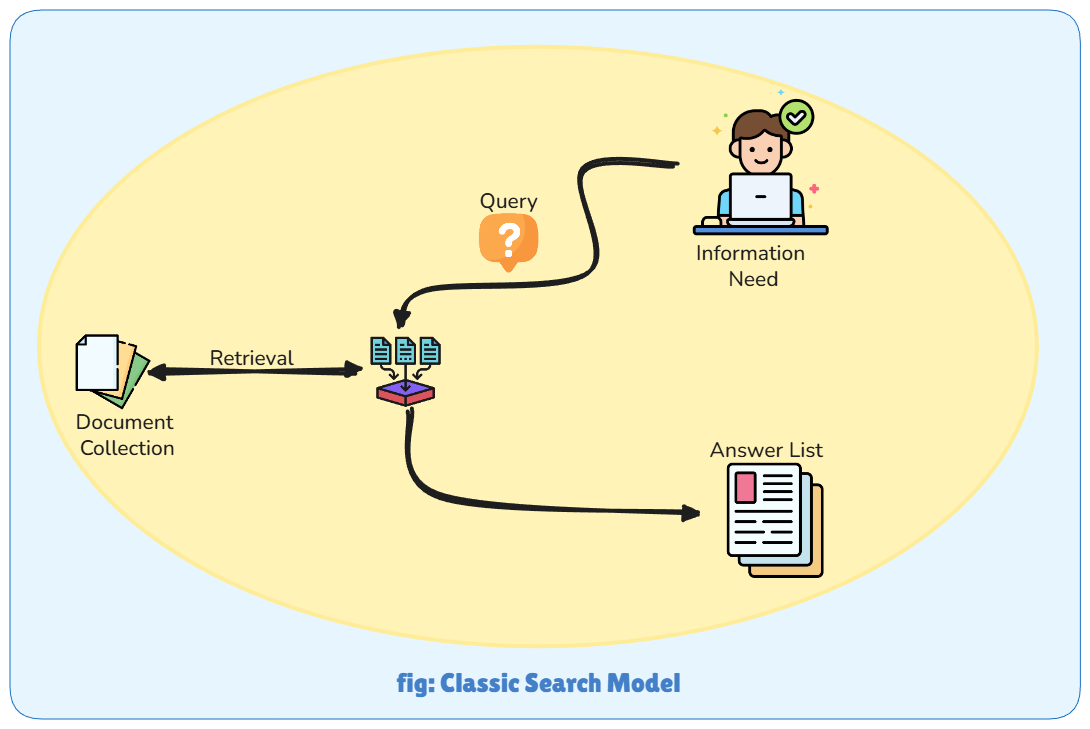
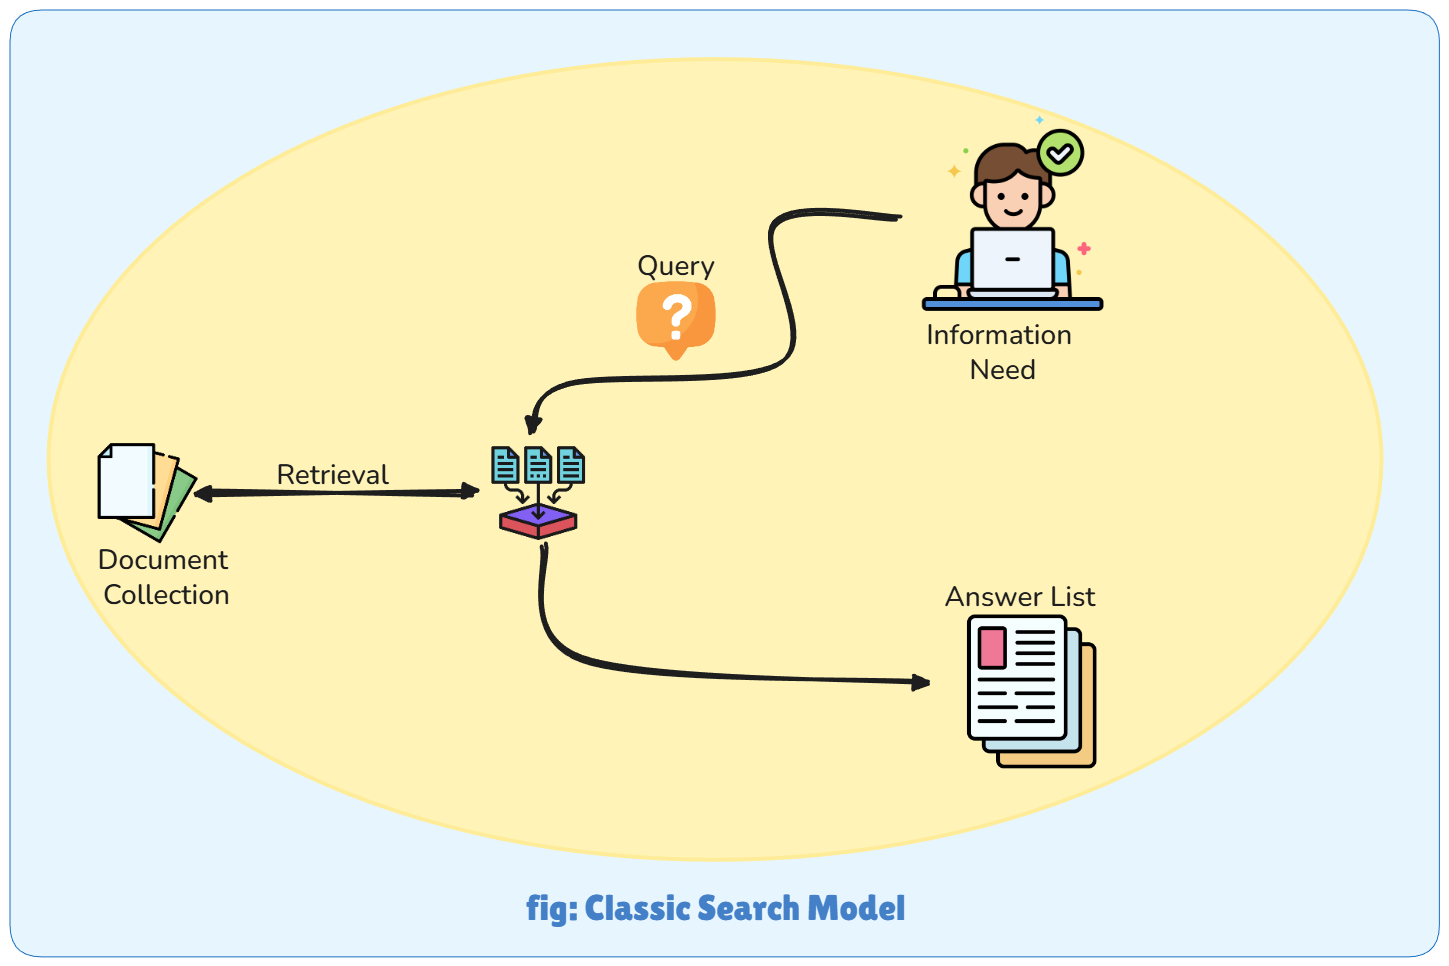
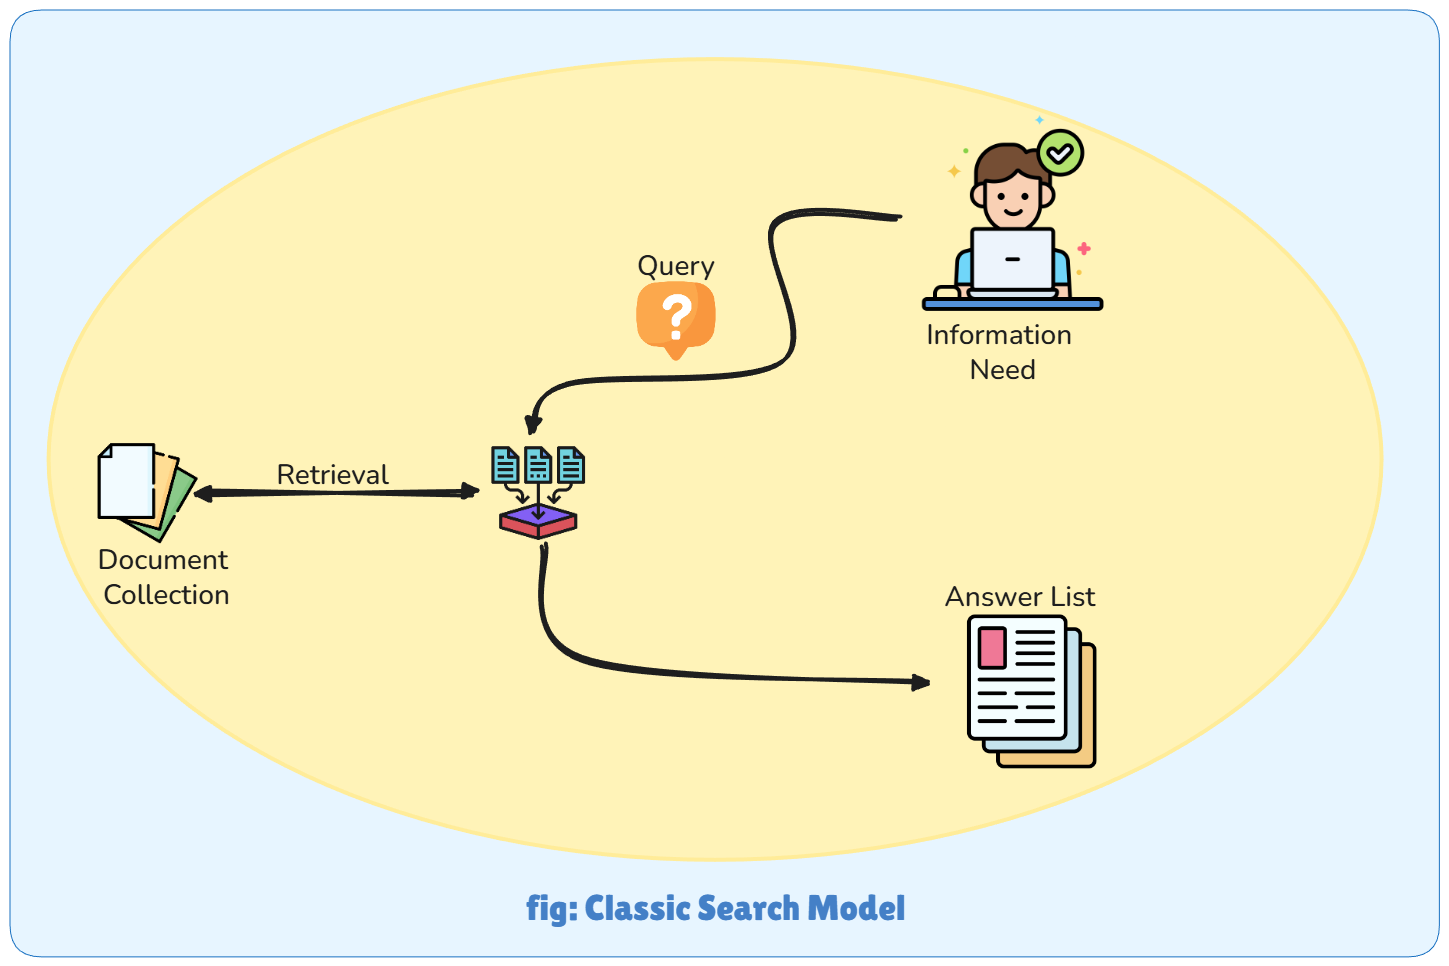
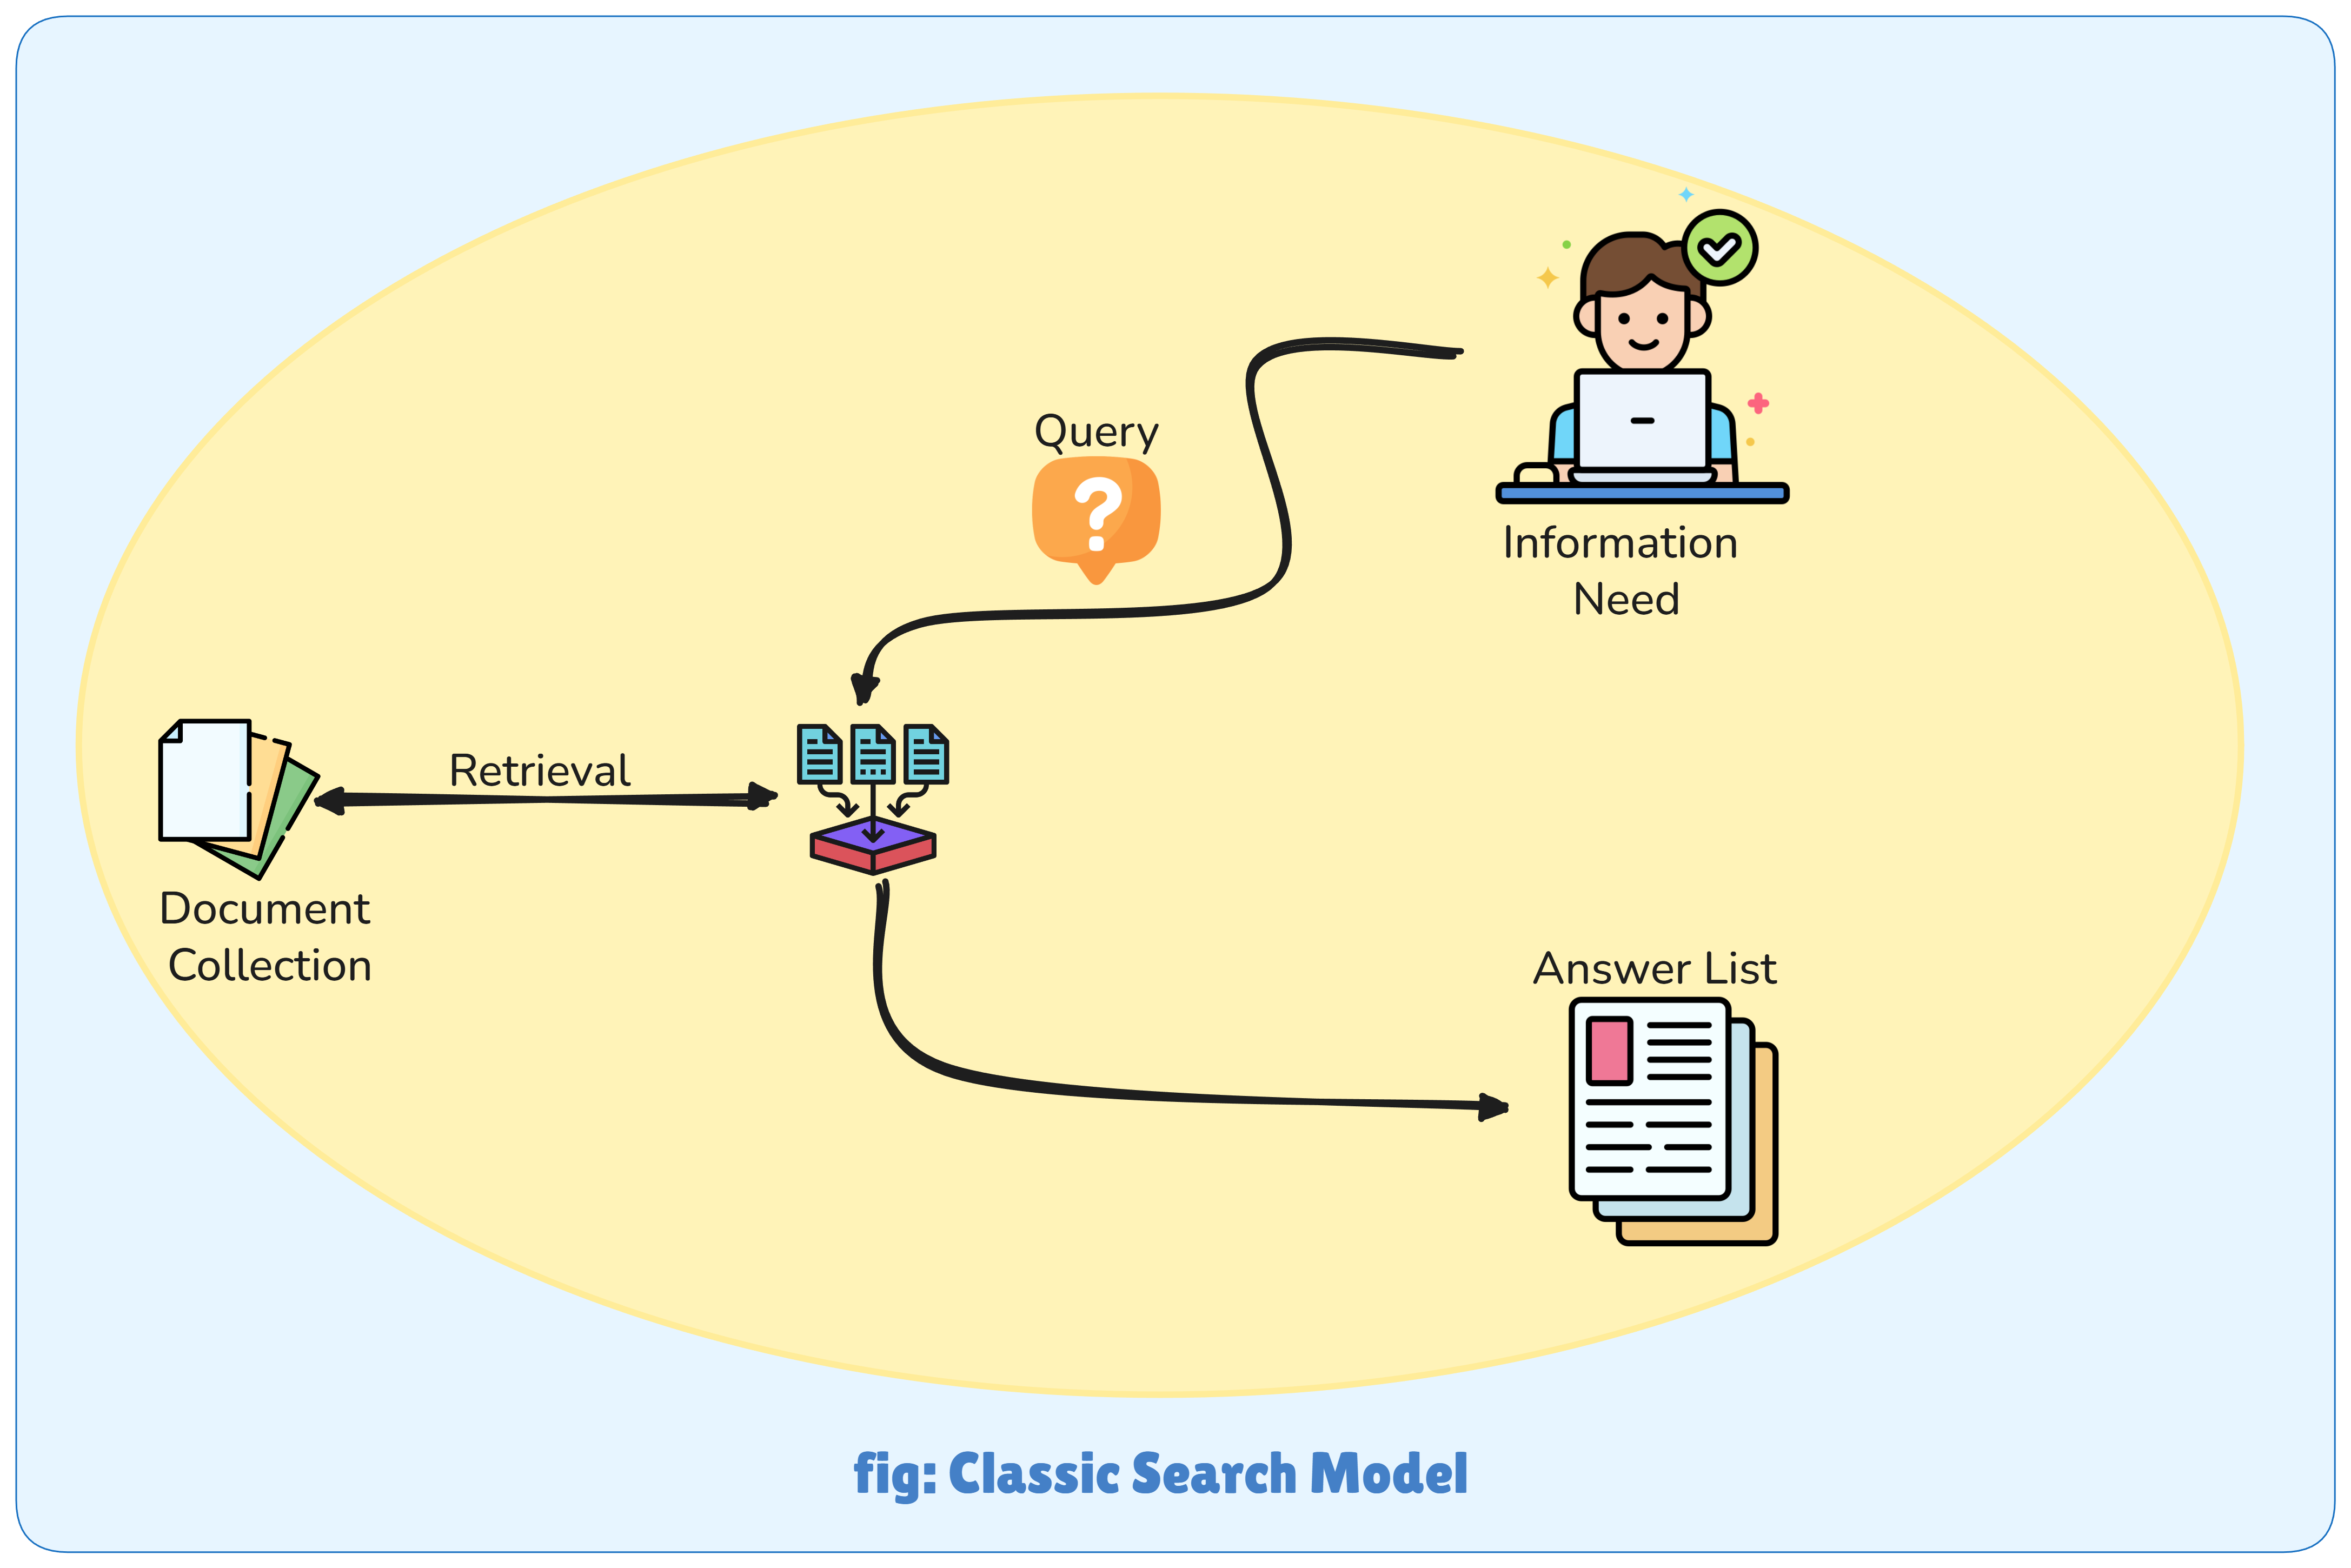

## Challenges to IR

1. Dealing with unstructured data
2. Lexical and semantic gaps
3. Incomplete query provided by user.
4. Scalability: Searching through huge amount of unstructured data.
5. Relevance Ranking:
6. Multilingual and cross lingual data.
7. Noisy and low quality data.
8. Dynamic and Evolving Content:

## Lexical Gap (Say vs Said)

- A lexical gap in IR can happen when there is no direct one-to-one word equivalence between the query and the document content, making it harder to match the query with relevant documents.

- Example: "He said he would go" may not match well with documents containing "He says he will go" if **stemming** or other forms of text processing aren't used.

- Solution: Use of techniques like stemming or lemmatization, which reduce words to their base or root form, can help reduce the impact of lexical gaps.

## Semantic Gap (Ranking Model vs. Retrieval Method):

- The semantic gap is the difference between what the user means in a query and what the IR system understands from it.

- A query uses certain word but relevant documents use different words or phrasing to express the same idea. The system fails to understand that they’re talking about the same thing — so it misses or ranks results poorly.

- Example: 
    - User asked for: "How to loose belly fat".
    - Document contains: "How to loose abdominal fat".
    - Here, there is no exact match for "Belly and abdominal" is present, so the IR system does not recognize the document
    - To fix it, we can use techniques like: synonym embeddings etc.

## Information Retrieval vs Database 

| **Feature**    | **Information Retrieval (IR)**         | **Database Systems (DBs)**      |
| -------------- | -------------------------------------- | ------------------------------- |
| **Data Type**  | Unstructured (e.g., text, documents)   | Structured (e.g., tables, rows) |
| **Query Type** | Keyword-based                          | SQL or structured queries       |
| **Results**    | Ranked by relevance                    | Exact matches                   |
| **Semantics**  | Meaning is often unclear or subjective | Clearly defined data and schema |
| **Main Goal**  | Find relevant information              | Retrieve precise, correct data  |
| **Focus**      | Effectiveness (quality of results)     | Efficiency (speed and accuracy) |

---

## Performance Measures

1. Precision

2. Recall

3. F–Measure

4. Accuracy

## Evalutation Matrics (Precision and Recall)

**Precision:** The percentage of **retrieved documents** that are actually relevant to the users information need.
$$
  \text{Precision} = \frac{\text{Relevant documents retrieved}}{\text{Total documents retrieved}}
$$

**Recall:** The percentage of **all relevant documents** in collection that were successfully retrieved.
$$
  \text{Recall} = \frac{\text{Relevant documents retrieved}}{\text{Total relevant documents in the collection}}
$$

> img: PrecisionAndRecall

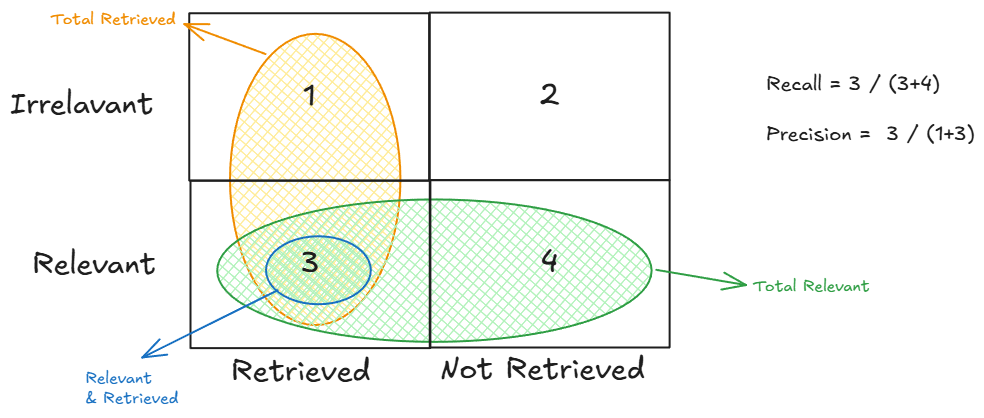



## The Precision/Recall Trade-off and the Need of F-Measure

- Accuracy: Why precision and recall alone cannot be used in an IR system. 

- Precision shows how many retrieved documents are relevant but ignores missing relevant ones.
- Recall shows how many relevant documents are found but ignores irrelevant ones retrieved.

**# Case:1** What happens when we retrieve ``0`` documents. 
- Precision = ``100%``
- Recall = ``0%``

**# Case:1** What happens when we retrieve ``ALL`` documents. 
- Precision = ``lowest``
- Recall = ``100%``

Hence Precision and Recall are inversely proportional
$\boxed{\text{Precision} \uparrow \implies \text{Recall} \downarrow}$
$\boxed{\text{Precision} \downarrow \implies \text{Recall} \uparrow}$

> Using both together gives a balanced view of relevance and completeness.
## Evaluation Matrics (F-Measure)

**F-Measure:** It is the combination of recall and precision. It is equal to the harmonic mean of the Precision and Recall.

$$
\text{F-measure} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$



---

# Boolean Retrieval Model (Document Retrieval Method)
- It used boolean expression for information retrieval

- Queries are formed using terms combined with Boolean operators like `AND, OR, and NOT`

Example: **Brutus** ``AND`` **Ceaser** but ``NOT`` **Calpurnia**

> **Note:** A linear way of information retireval using Booleans Operators and efficient but slow for large collections (corpus). So we use 

1. Term Document Incidence Matrix

2. The Inverted Index Matrix

## 1. Term Document Incidence Matrix

Each document is represented as a vector of binary values (1 if the term is present, 0 if absent).

- A large matrix where rows are terms and columns are documents. The cell `(t, d)` is `1` if the term is present, `0` if absent.

- It is a matrix of (Terms, Docs). Terms in rows and Docs in cols.

**Example:**
| Term   |  Doc1 |  Doc2 |  Doc3 |
|----|---|-----|----|
| apple  |   1   |   0   |   1 |
| banana |   0   |   1   |   1 |

**Use case:** Boolean queries (AND, OR, NOT).

### **Problem with Term Document Index Matrix and its solution**
**The Scalability Problem:** For a large collection (e.g., 1 million documents), this matrix becomes extremely large and sparse (mostly zeros). For example, a 1M-document collection could result in a matrix that is 99.8% zeros, making it an inefficient use of storage.

**The Solution:** Inverted Index: We store only the non-zero entries (the 1s). An inverted index maps each term to a "posting list" of documents that contain it

## 2. Inverted Index Matrix.

This is the "key data structure underlying modern IR". It's a better way to store the data from the sparse matrix by only recording the "1" positions.


An inverted index has two main components:


1. **Dictionary (or Terms):** The list of all unique indexing terms (the vocabulary).


2. **Postings (or Postings Lists):** For each term in the dictionary, this is a list of all the document IDs (docIDs) that contain that term. These lists are sorted by docID.


* **Example:**

  ```
  apple  → {Doc1, Doc3, Doc5}
  banana → {Doc1, Doc2}
  ```

> **Note:** It uses fixed sized array, to store documents numbers.

* **Most widely used** in search engines.

### Issue with Inverted Index Matrix. 
In dynamic data, we cannot use, fixed size array. As new documents will be added, and we need to store more entries in Inverted Index Matrix which will be impossible after the array size is full. 

**Solution:** Variable size array (or **Linked List**) are preferred in Inverted Index Matrix

## Importance of Inverted Index

1. Efficinet retrieval (Fast lookup)

2. Stores Mapping of terms (posting lists)

3. Handles large document collections.


---

# Indexing 

In **Information Retrieval (IR)**, *indexing* means creating a data structure that allows **fast searching and retrieval of documents**. Different types of indexing exist depending on how documents and terms are stored.

## Types of Indexing

### 1. **Forward Index (Document-Term Index)**

* **What it is:** Stores, for each **document**, the list of terms it contains.
* **Example:**

  ```
  Doc1 → {apple, banana, mango}
  Doc2 → {banana, orange}
  ```
* **Limitation:** Good for constructing indexes, but not efficient for searching (to answer "which docs contain 'apple'?").

---

### 2. **Inverted Index (Term-Document Index)**

* **What it is:** Stores, for each **term**, the list of documents where it appears.
* **Example:**

  ```
  apple  → {Doc1, Doc3, Doc5}
  banana → {Doc1, Doc2}
  ```

> **Note:** It uses fixed size array to store Doc Numbers.

* **Most widely used** in search engines.

---

### 3. **Positional Index (Inverted Index + Positions)**

* **What it is:** Stores not only the documents but also the **positions** of the term in the document.
* **Example:**

  ```
  apple → {Doc1: [2, 15], Doc3: [7]}
  ```
* **Use case:** Phrase queries (“machine learning”) or proximity search (“AI within 3 words of data”).



---


## Initial stages of text processing

### 1. **Preprocessing:** 
  - Converting each word into lowercase:**
  - e.g., "Apple" → "apple"

### 2. **Tokenization:**
  - Breaking down a continuous sequence of characters (text) into smaller units called tokens, usually words.
  - For example, splitting the sentence “John’s book” into tokens like \["John’s", "book"].

### 3. **Normalization:**
  - Converting different textual variations to a standard form, so words that mean the same thing match.
  - Example: mapping “U.S.A.” and “USA” to the same form so they are treated as equal.

### 4. **Stemming:**
  - Reducing words to their root form to group different forms of the same word.
  - Example: “authorize” and “authorization” share the root “authoriz-”.

### 5. **Stopwords Removal:**
  - Commonly used words like “the,” “a,” “to,” “of” that often carry little meaning and can be removed to reduce noise in processing. Sometimes they’re kept depending on the task.
Here’s your refined and complete version — smoother, more structured, and in clear **exam-style English** while keeping all your original points:



### **Difficulties in Tokenization**


1. **Ambiguity in word boundaries:**
   In some languages (such as Chinese or Japanese), there are no spaces between words, making it difficult to determine where one word ends and the next begins.

2. **Punctuation issues:**
   Punctuation marks (like commas, periods, or hyphens) can appear in various contexts. For instance, “U.S.A.” should be treated as one token, not three separate ones.

3. **Apostrophes:**
   Words containing apostrophes, such as *can’t* (cannot) or *Shivam’s* (belonging to Shivam), can be tokenized differently depending on how apostrophes are handled.

4. **Hyphenated words:**
   It can be confusing whether to treat hyphenated terms as single or multiple tokens. For example, *well-known*, *New-York*, and *co-operative* could be interpreted in different ways.

5. **Numbers and special symbols:**
   Numerical expressions like *10,000* or *3.5%*, and symbols like *#AI* or *$100*, create ambiguity about whether to treat them as single tokens or separate parts.

6. **Email addresses and URLs:**
   Strings such as *[smith-john@stanford.edu](mailto:smith-john@stanford.edu)* or *[https://example.com](https://example.com)* are difficult to split correctly without breaking their meaning.

7. **Abbreviations:**
   Abbreviations like *Dr.* or *Mr.* should be treated as complete tokens even though they end with a period.


---
---

# Questions:

## Question 1:

You are given a collection of 5 documents:

* **Doc1:** *English tutorial and fast track*
* **Doc2:** *Learning latent semantic indexing*
* **Doc3:** *Book on semantic indexing*
* **Doc4:** *Advance in structure and semantic indexing*
* **Doc5:** *Analysis of latent structures*

1. Draw the **term-document incidence matrix** for this document collection.

2. Evaluate the Boolean **query**:

- **advance AND structure AND NOT analysis**

## Solution
<details>
<summary>
Click for Answer
</summary>

### **Term-Document Incidence Matrix**

| Term       | Doc1 | Doc2 | Doc3 | Doc4 | Doc5 |
| ---------- | ---- | ---- | ---- | ---- | ---- |
| english    | 1    | 0    | 0    | 0    | 0    |
| tutorial   | 1    | 0    | 0    | 0    | 0    |
| fast       | 1    | 0    | 0    | 0    | 0    |
| track      | 1    | 0    | 0    | 0    | 0    |
| learning   | 0    | 1    | 0    | 0    | 0    |
| latent     | 0    | 1    | 0    | 0    | 1    |
| semantic   | 0    | 1    | 1    | 1    | 0    |
| indexing   | 0    | 1    | 1    | 1    | 0    |
| book       | 0    | 0    | 1    | 0    | 0    |
| advance    | 0    | 0    | 0    | 1    | 0    |
| structure  | 0    | 0    | 0    | 1    | 0    |
| analysis   | 0    | 0    | 0    | 0    | 1    |
| structures | 0    | 0    | 0    | 0    | 1    |


###  Evaluate Query

**advance AND structure AND NOT analysis**

Let’s get the binary row for each:

* **advance:**     `[0 0 0 1 0]`
* **structure:**   `[0 0 0 1 0]`
* **analysis:**    `[0 0 0 0 1]` → NOT: `[1 1 1 1 0]`

Now apply Boolean operations:

$$
(advance \land structure) = [0 0 0 1 0]
$$

$$
(advance \land structure) \land (\lnot analysis) = [0 0 0 1 0] \land [1 1 1 1 0] = [0 0 0 1 0]
$$


**Answer:** $\boxed{\textbf{Doc4}}$


</details>


---

## Question 2:

Consider these documents:

* **Doc1:** *breakthrough drug for schizophrenia*
* **Doc2:** *new schizophrenia drug*
* **Doc3:** *new approach for treatment of schizophrenia*
* **Doc4:** *new hopes for schizophrenia patients*

- Draw the **term‐document incidence matrix** for this document collection.
- Draw the **inverted index representation** for this collection.

For the document collection shown in above question, what are the returned results for these Boolean queries:

* **schizophrenia AND drug**
* **for AND NOT(drug OR approach)**

### Solution

<details>

<summary>Click for Solution</summary>
### **Term-Document Incidence Matrix**

| Term          | Doc1 | Doc2 | Doc3 | Doc4 |
| ------------- | ---- | ---- | ---- | ---- |
| breakthrough  | 1    | 0    | 0    | 0    |
| drug          | 1    | 1    | 0    | 0    |
| for           | 1    | 0    | 1    | 1    |
| schizophrenia | 1    | 1    | 1    | 1    |
| new           | 0    | 1    | 1    | 1    |
| approach      | 0    | 0    | 1    | 0    |
| treatment     | 0    | 0    | 1    | 0    |
| hopes         | 0    | 0    | 0    | 1    |
| patients      | 0    | 0    | 0    | 1    |

---

### **Inverted Index Representation**

| Term          | Document IDs           |
| ------------- | ---------------------- |
| breakthrough  | Doc1                   |
| drug          | Doc1, Doc2             |
| for           | Doc1, Doc3, Doc4       |
| schizophrenia | Doc1, Doc2, Doc3, Doc4 |
| new           | Doc2, Doc3, Doc4       |
| approach      | Doc3                   |
| treatment     | Doc3                   |
| hopes         | Doc4                   |
| patients      | Doc4                   |


### **Evaluate Queries**

#### Query 1: **schizophrenia AND drug**

* **schizophrenia:** `[1 1 1 1]`
* **drug:** `[1 1 0 0]`
* **AND:** `[1 1 0 0]`

**Answer:** $\boxed{\textbf{Doc1, Doc2}}$


#### Query 2: **for AND NOT(drug OR approach)**

* **for:** `[1 0 1 1]`
* **drug:** `[1 1 0 0]`
* **approach:** `[0 0 1 0]`
* **drug OR approach:** `[1 1 1 0]`
* **NOT(drug OR approach):** `[0 0 0 1]`
* **for AND NOT(drug OR approach):** `[1 0 1 1] AND [0 0 0 1] = [0 0 0 1]`

**Answer:** $\boxed{\textbf{Doc4}}$

</details>


---

## Question 3:

• Draw the **inverted index** that would be built for the following document collection:

* **Doc1:** *new home sales top forecasts*
* **Doc2:** *home sales rise in july*
* **Doc3:** *increase in home sales in july*
* **Doc4:** *july new home sales rise*


### Solution

<details>
<summary>Click for Solution</summary>
### **Inverted Index Representation**

| **Term**  | **Document IDs**       |
| --------- | ---------------------- |
| new       | Doc1, Doc4             |
| home      | Doc1, Doc2, Doc3, Doc4 |
| sales     | Doc1, Doc2, Doc3, Doc4 |
| top       | Doc1                   |
| forecasts | Doc1                   |
| rise      | Doc2, Doc4             |
| in        | Doc2, Doc3             |
| july      | Doc2, Doc3, Doc4       |
| increase  | Doc3                   |

</details>


## Question 4:

• Let the following be a set of documents:

* **D1:** *SDK, Android, Google, Mobile, Software*
* **D2:** *Song, Android, Radiohead, Paranoid, Yorke*
* **D3:** *SDK, System, Android, Kernel, Linux*
* **D4:** *Android, Mobile, Google, Software, System*
* **D5:** *Mobile, Swisscom, SMS, subscription, rate*

And the following be a set of Boolean queries:

* **R1:** Android OR SDK OR Google OR Mobile
* **R2:** Android AND SDK AND Google AND Mobile

### Solution


<details>
<summary>Click for Solution</summary>

### **Inverted Index Representation**

| **Term**     | **Document IDs** |
| ------------ | ---------------- |
| SDK          | D1, D3           |
| Android      | D1, D2, D3, D4   |
| Google       | D1, D4           |
| Mobile       | D1, D4, D5       |
| Software     | D1, D4           |
| Song         | D2               |
| Radiohead    | D2               |
| Paranoid     | D2               |
| Yorke        | D2               |
| System       | D3, D4           |
| Kernel       | D3               |
| Linux        | D3               |
| Swisscom     | D5               |
| SMS          | D5               |
| subscription | D5               |
| rate         | D5               |

### **Evaluate Queries**

#### Query R1: **Android OR SDK OR Google OR Mobile**

* **Android:** `[1 1 1 1 0]`
* **SDK:** `[1 0 1 0 0]`
* **Google:** `[1 0 0 1 0]`
* **Mobile:** `[1 0 0 1 1]`
* **OR all:** `[1 1 1 1 1]`

**Answer:** $\boxed{\textbf{D1, D2, D3, D4, D5}}$

#### Query R2: **Android AND SDK AND Google AND Mobile**



**Answer:** $\boxed{\textbf{D1}}$

</details>

---

## Query Optimization in Boolean Retrieval 

This tells us how we can optimzise the query for boolean retrieval. 

### 1. ``AND`` in t terms.

Let take an example:
**Brutus AND Calpurnia AND Caesar**

* Looking at this example → there is more than one way to answer the query:

  * **Brutus AND (Calpurnia AND Caesar)**
  * **(Brutus AND Calpurnia) AND Caesar**
  * **(Brutus AND Caesar) AND Calpurnia**

Question is which of these 3 is fastest?

For example, if posting list sizes are:

* |Brutus| = 7
* |Calpurnia| = 8
* |Caesar| = 2

Then:

  * **Brutus AND (Calpurnia AND Caesar)** = 7 AND (8 AND 2) = 7 AND 2 = 2
  * **(Brutus AND Calpurnia) AND Caesar** = (7 AND 8) AND 2 = 7 AND 2 = 2
  * **(Brutus AND Caesar) AND Calpurnia** = (7 AND 2) AND 8 = 2 AND 8 = 2

Hence, the **fastest** is the order where we process in the order of increasing frequency size.

### 2. ``AND`` with ``OR``

If suppose if we have the query of this form  ``(___ OR ___) AND (___ OR ___) AND (___ OR ___)``

- Which operation to perform first.

**Step 1:** Get frequencies for all terms

**Step 2:** Estimate the size of each OR operation by the sum of its term frequencies

**Step 3:** Process OR groups in increasing order of their estimated sizes



---

## Question 5:

In an inverted index over 0.5 million documents, the following term–document frequencies were observed:

| Term         | Document frequency |
| ------------ | -----------------: |
| eyes         |            213,312 |
| kaleidoscope |             87,009 |
| marmalade    |            107,913 |
| skies        |            271,658 |
| tangerine    |             46,653 |
| trees        |            316,812 |

Recommend a query processing order for the following queries:

(i) `(tangerine OR trees) AND (marmalade OR skies) AND (kaleidoscope OR eyes)`

(ii) `tangerine AND (NOT marmalade) AND (NOT trees)`

### Solution


<details>
<summary>Click for Solution</summary>
### Preparation — estimate OR-clause sizes

Approximate union size by summing the two term frequencies (upper bound ignoring overlap):

1. `(tangerine OR trees)` ≈ 46,653 + 316,812 = **363,465**
2. `(marmalade OR skies)` ≈ 107,913 + 271,658 = **379,571**
3. `(kaleidoscope OR eyes)` ≈ 87,009 + 213,312 = **300,321**

Smaller clause → more selective → should be evaluated first when doing ANDs.

### (i) `(tangerine OR trees) AND (marmalade OR skies) AND (kaleidoscope OR eyes)`

Query order will be 

`(kaleidoscope OR eyes) AND (tangerine OR trees) AND (marmalade OR skies)`

### (ii) `tangerine AND (NOT marmalade) AND (NOT trees)`

1. `tangerine` = 46,653
2. `NOT marmalade` = 5000000-107913 = 4892087
3. `NOT trees` = 5000000 – 316812 = 4683188

Query order will be 

`tangerine AND (NOT trees) AND (NOT marmalade)`

</details>

---

## Question 6: Imagine you have a collection of a million documents (N) with an average of 1,000 words per document and a total of M = 500,000 terms (unique words). Which of the following statements is **false** regarding its term-Document Incidence Matrix?

a. The matrix would be extremely sparse (most entries would be 0).

b. The matrix would consist of a distribution of 0 and 1 with dimension M by N.

c. The matrix shows the term frequency (tf) of each term in each document.

d. Each column (vector) shows which terms are present in each document.

<details>
<summary>
Click for Answer
</summary>
C
</details>

## Question 7: Which of the following statements is **false** with regards to Boolean Retrieval model?

a. It answers queries based on Boolean expressions (AND, OR and NOT).

b. It views documents as a set of terms.

c. It is very precise, as its queries need to meet a very specific condition.

d. It cannot combine two operators, such as “AND NOT” or “OR NOT”.

<details>
<summary>
Click for Answer
</summary>
D
</details>


## Question 8:  Select the most efficient processing order for the Boolean query Q.

### 1. **“trees AND marmalade AND eyes”**

| Term      | Frequency |
| --------- | --------- |
| eyes      | 213,312   |
| marmalade | 107,913   |
| trees     | 316,812   |

a. (marmalade AND eyes) first, then merge with trees.

b. (marmalade AND trees) first, then merge with eyes.

c. (trees AND eyes) first, then merge with marmalade.

d. Any combination would result in the same amount of operations.

<details>
<summary>
Click for Answer
</summary>
A
</details>

## Question 9:  Limitations of Boolean Retrieval

1. Not tolerant to Spelling mistake

2. Only retrieve the result, no **ranking** of result is retrieved.


## Question 10: Which of the following statements is **false** regarding the Boolean Retrieval model?

a. It does not perform query spell checking.

b. It does not capture information about term position in the documents.

c. It does not consider document structure (zones in documents such as headers).

d. It considers term frequency information to rank results.

<details>
<summary>
Click for Answer
</summary>
D
</details>


## Question 11: What are Information Retrieval (IR) ingredients?

**Ans:**

<details>
<summary>
Click for Answer
</summary>
* Documents representation
* Query formulation
* Query processing
</details>

## Question 12: How we measure relevant document in IR?

**Ans:**

<details>
<summary>
Click for Answer
</summary>

* Precision
* Recall
</details>

## Question 13: What is index? What is indexing

**Ans.**
<details>
<summary>
Click for Answer
</summary>

- An index is a systematic arrangement of entries designed to enable users to locate information in a document. It is an essential tool to accessing and revisiting content.

* The process of creating an index is called indexing

</details>




## Question 14: What is information retrieval?

**Ans.**

<details>
<summary>
Click for Answer
</summary>

* Information retrieval is the process of obtaining information resources relevant to an information need from a collection of information resources.
</details>


## Question 15: What is necessity of automated information retrieval?

**Ans.**
<details>
<summary>
Click for Answer
</summary>

* To reduce the 'information overload'.
</details>

## Question 16: Give an example of visible IR application.

**Ans.**

<details>
<summary>
Click for Answer
</summary>

* Web search engine
</details>

## Question 17: What is the basis of searching in IR system

**Ans.**
<details>
<summary>
Click for Answer
</summary>

* It is based on metadata or full-text (or other content-based indexing)
</details>
